# Carga de datos

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración gráfica
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (6, 5)


In [2]:
# Reemplaza 'data.csv' con el nombre correcto si es diferente
df = pd.read_csv('data.csv')
df.head()


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Validacion de datos

In [3]:
# Información general
df.info()

# Verificar valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

# Outliers (Valores atípicos)

C:\Users\Jose\AppData\Local\Temp\ipykernel_12468\3459951617.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,5))


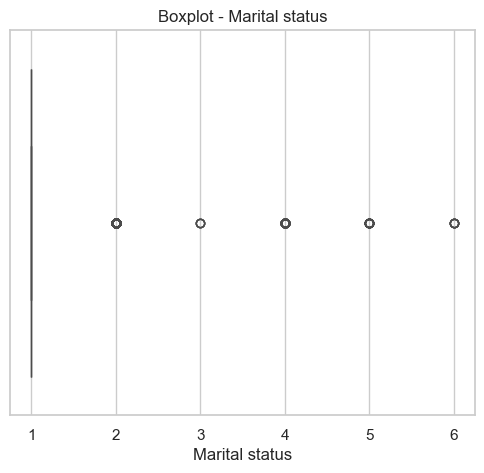

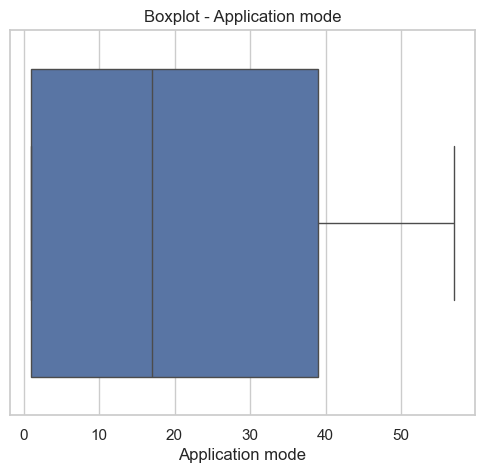

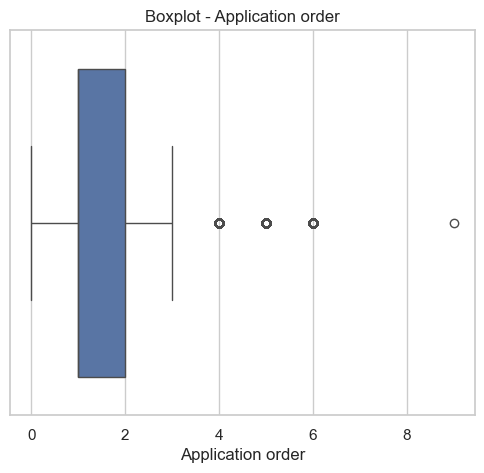

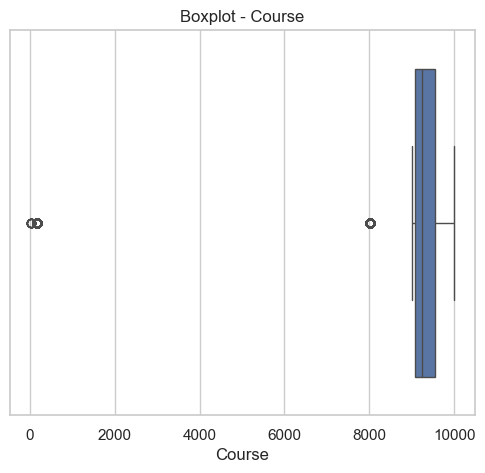

c:\Users\Jose\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


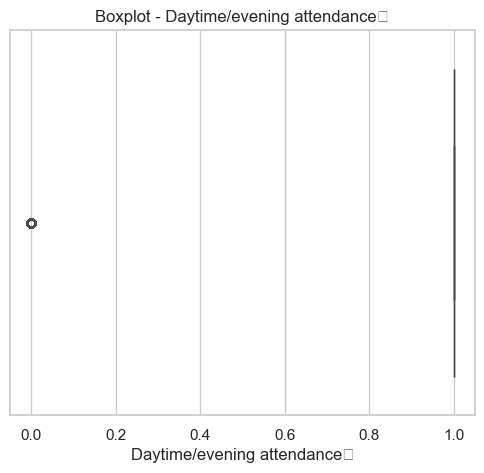

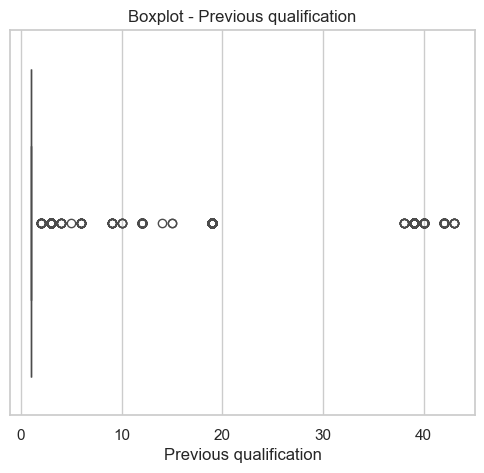

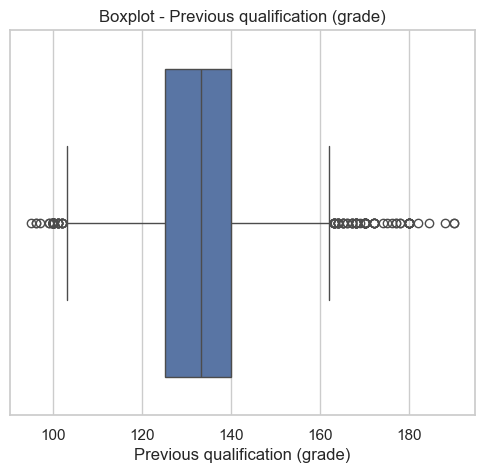

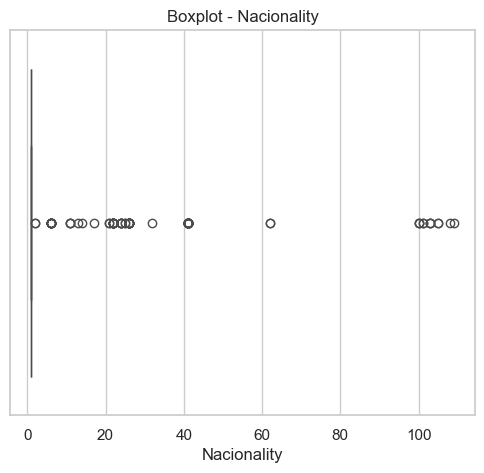

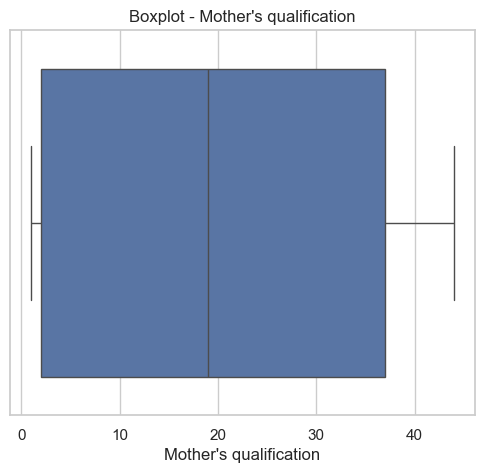

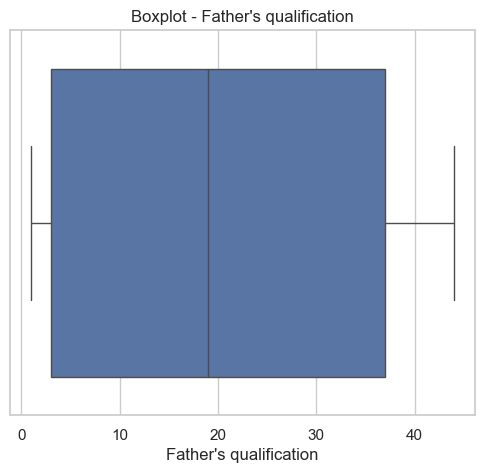

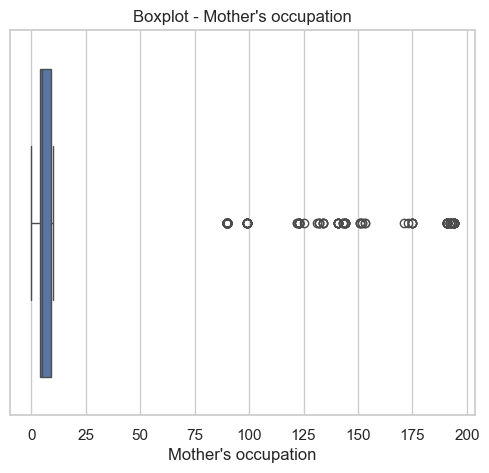

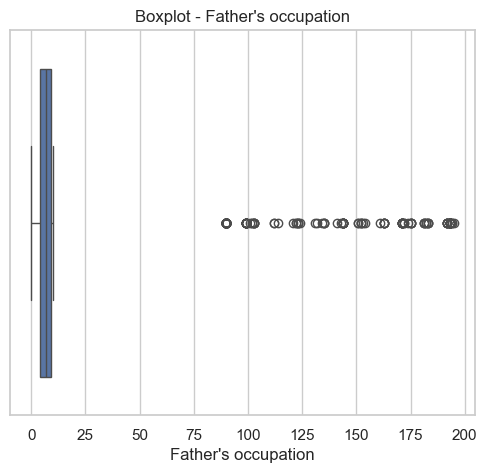

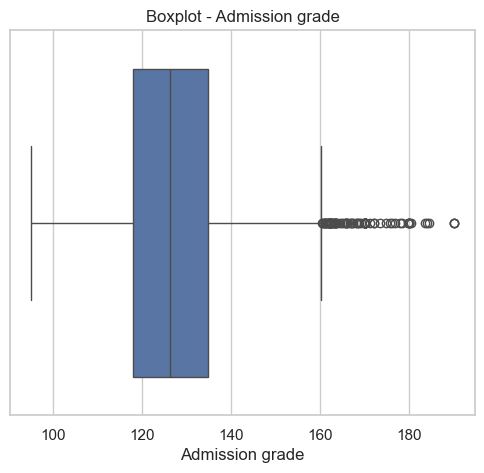

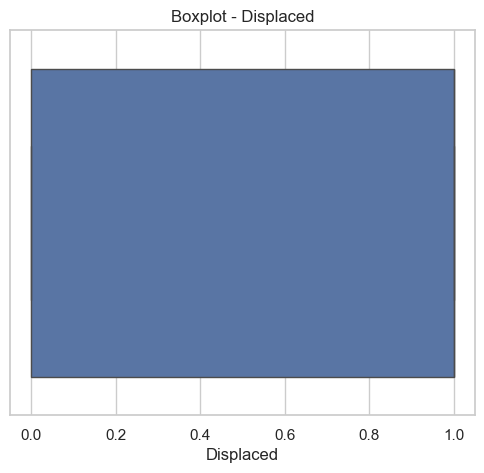

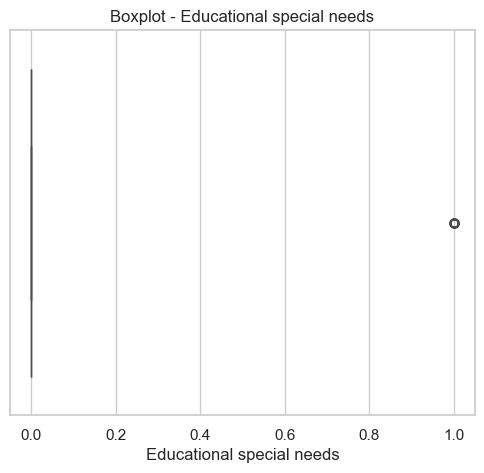

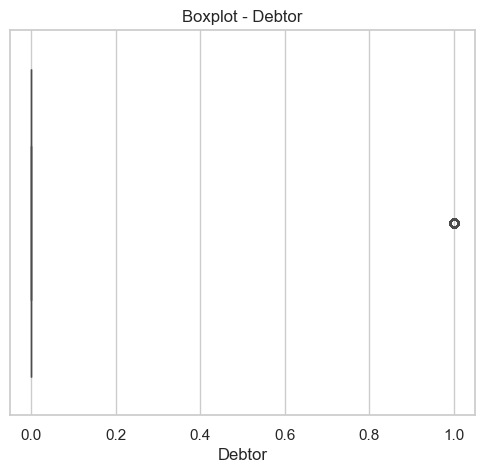

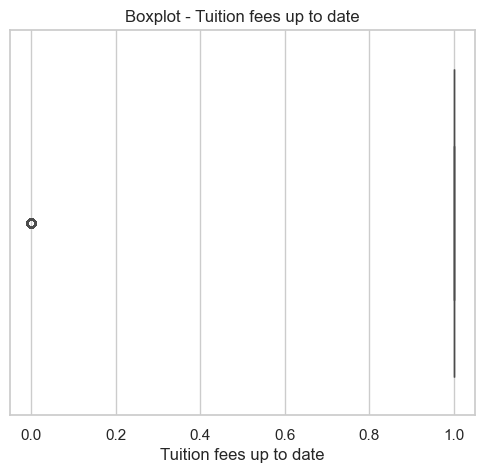

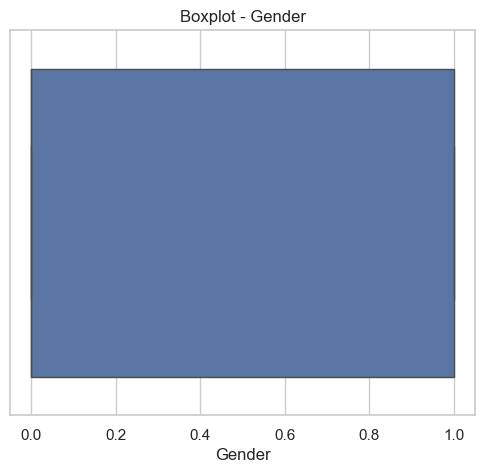

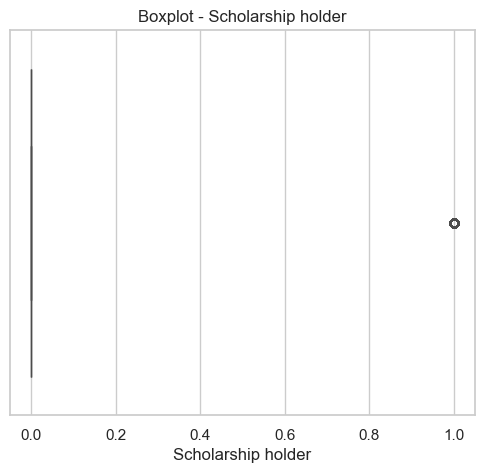

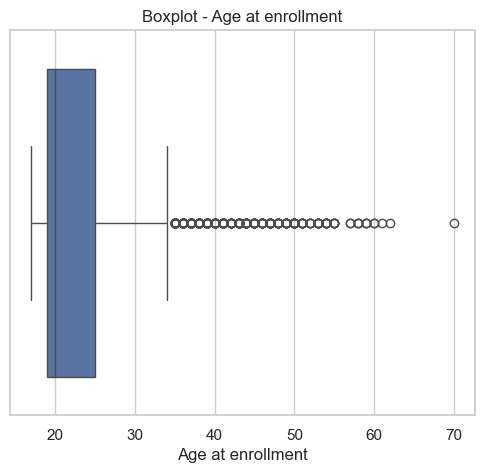

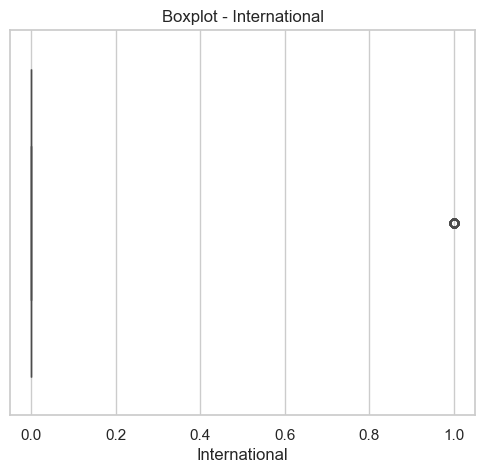

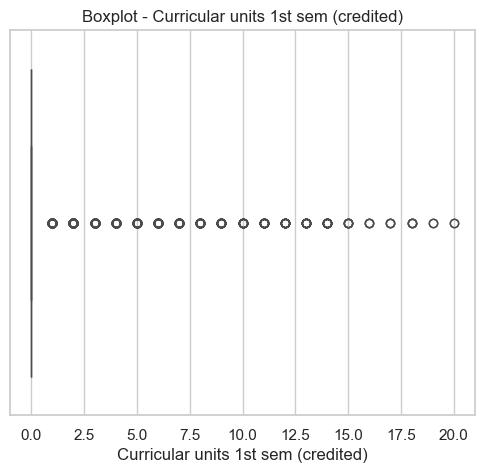

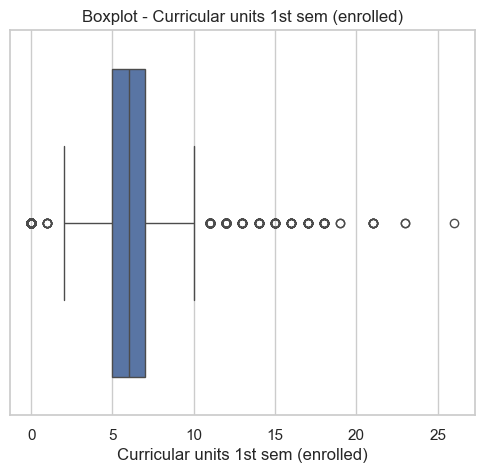

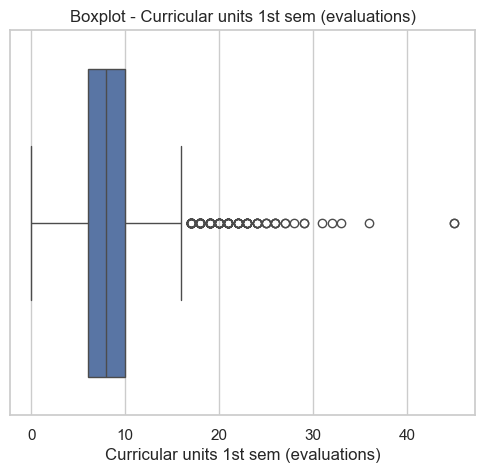

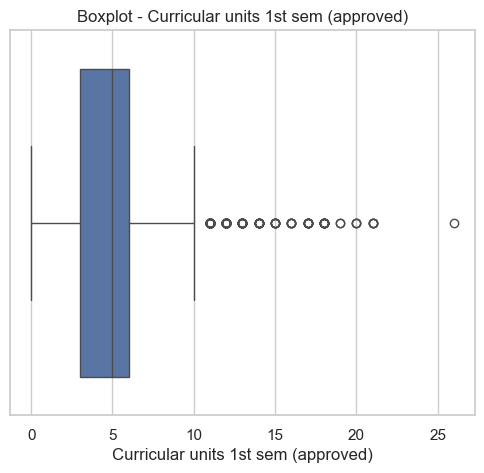

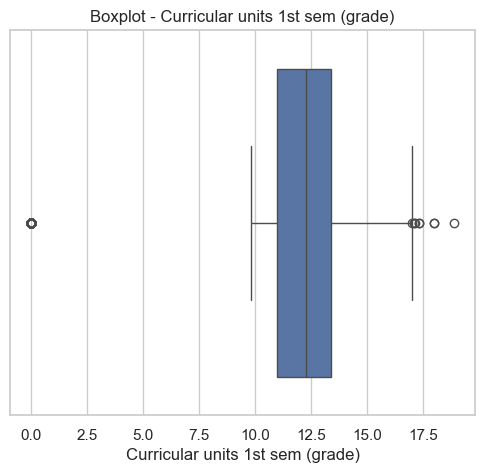

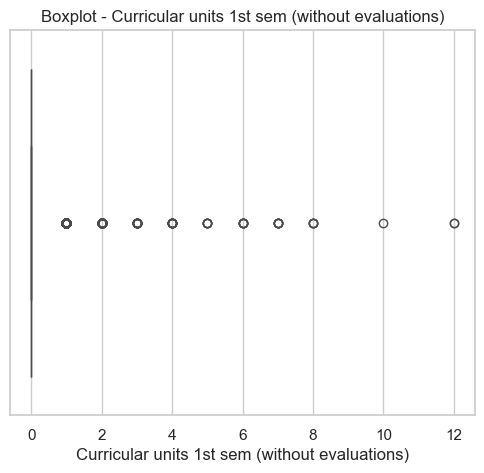

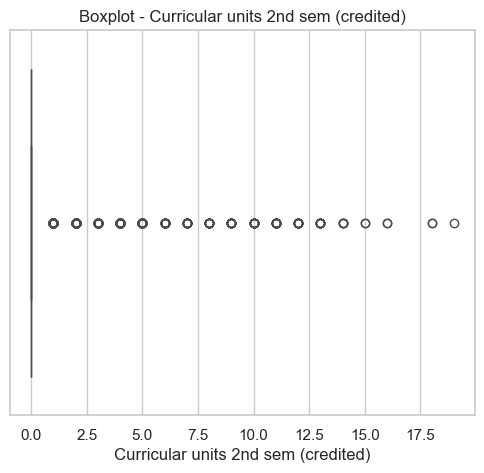

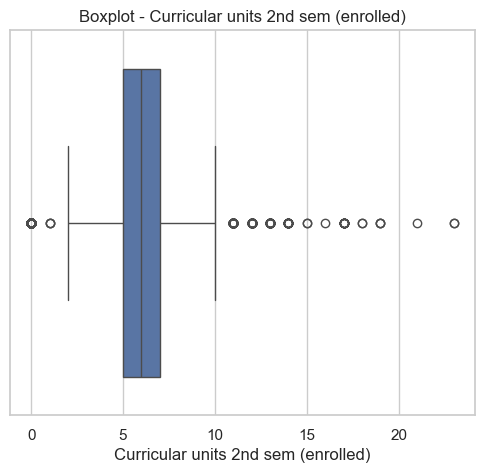

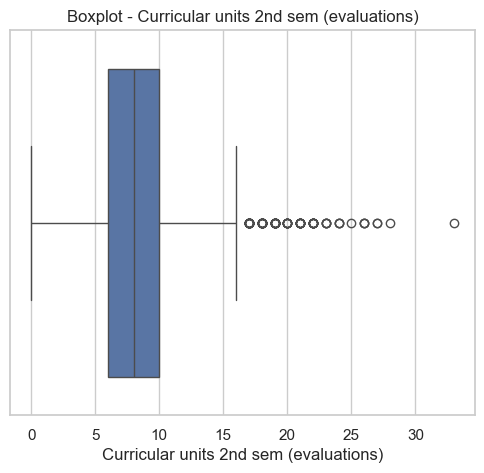

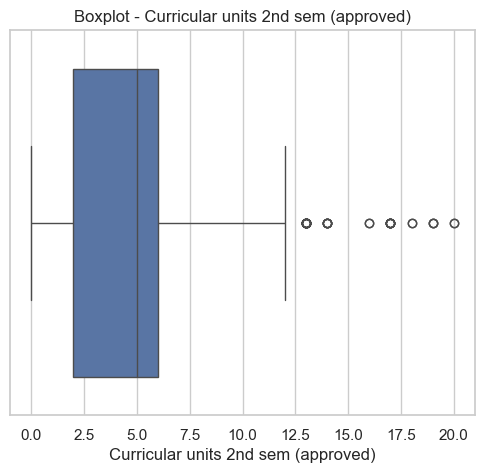

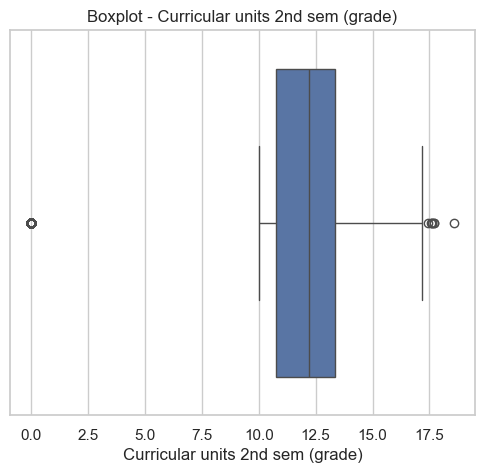

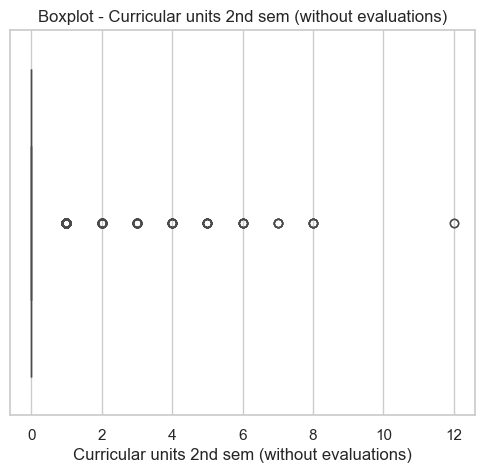

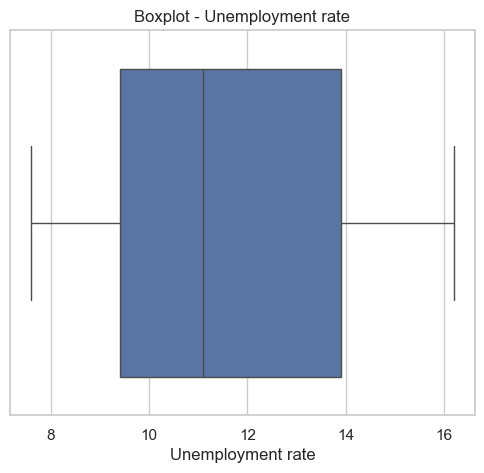

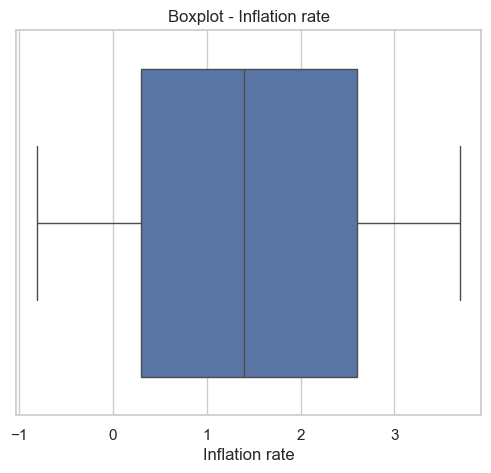

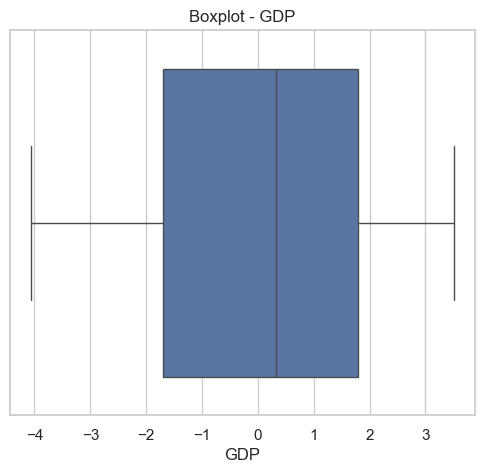

<Figure size 600x500 with 0 Axes>

In [6]:
# Generar boxplots para columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
#numeric_cols = df.select_dtypes(include=np.number).columns.to_list()
#df.boxplot(by="", column=numeric_cols, figsize=(15, 10), vert=False)
#plt.suptitle('Diagramas de caja para outliers')
#plt.tight_layout()
#plt.show()

for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot - {col}")
    plt.figure(figsize=(6,5))

plt.show()


# Medidas de tendencia central

In [19]:
# Medidas de tendencia central
numericas = df.select_dtypes(include='number')

# Calcular las medidas de tendencia central
t_central = pd.DataFrame({
    'Media': numericas.mean(),
    'Mediana': numericas.median(),
    'Moda': numericas.mode().iloc[0]
})

# Mostrar la tabla de medidas de tendencia central
t_central

,Media,Mediana,Moda
Marital status,1.178571,1.000000,1.00
Application mode,18.669078,17.000000,1.00
Application order,1.727848,1.000000,1.00
Course,8856.642631,9238.000000,9500.00
Daytime/evening attendance\t,0.890823,1.000000,1.00
Previous qualification,4.577758,1.000000,1.00
Previous qualification (grade),132.613314,133.100000,133.10
Nacionality,1.873192,1.000000,1.00
Mother's qualification,19.561935,19.000000,1.00
Father's qualification,22.275316,19.000000,37.00


# Medidas de dispersión

In [ ]:
# Medidas de tendencia central
numericas = df.select_dtypes(include='number')

# Calcular las medidas de dispersión
dispersion = pd.DataFrame({
    'Rango': numericas.max() - numericas.min(),
    'Desviación estándar': numericas.std(),
    'Varianza': numericas.var()
})

# Mostrar la tabla de medidas de dispersión
dispersion


,Rango,Desviación estándar,Varianza
Marital status,5.000000,0.605747,3.669294e-01
Application mode,56.000000,17.484682,3.057141e+02
Application order,9.000000,1.313793,1.726052e+00
Course,9958.000000,2063.566416,4.258306e+06
Daytime/evening attendance\t,1.000000,0.311897,9.727954e-02
Previous qualification,42.000000,10.216592,1.043788e+02
Previous qualification (grade),95.000000,13.188332,1.739321e+02
Nacionality,108.000000,6.914514,4.781050e+01
Mother's qualification,43.000000,15.603186,2.434594e+02
Father's qualification,43.000000,15.343108,2.354110e+02


# Exploracion gráfica

C:\Users\Jose\AppData\Local\Temp\ipykernel_22892\2882537514.py:4: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\Jose\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


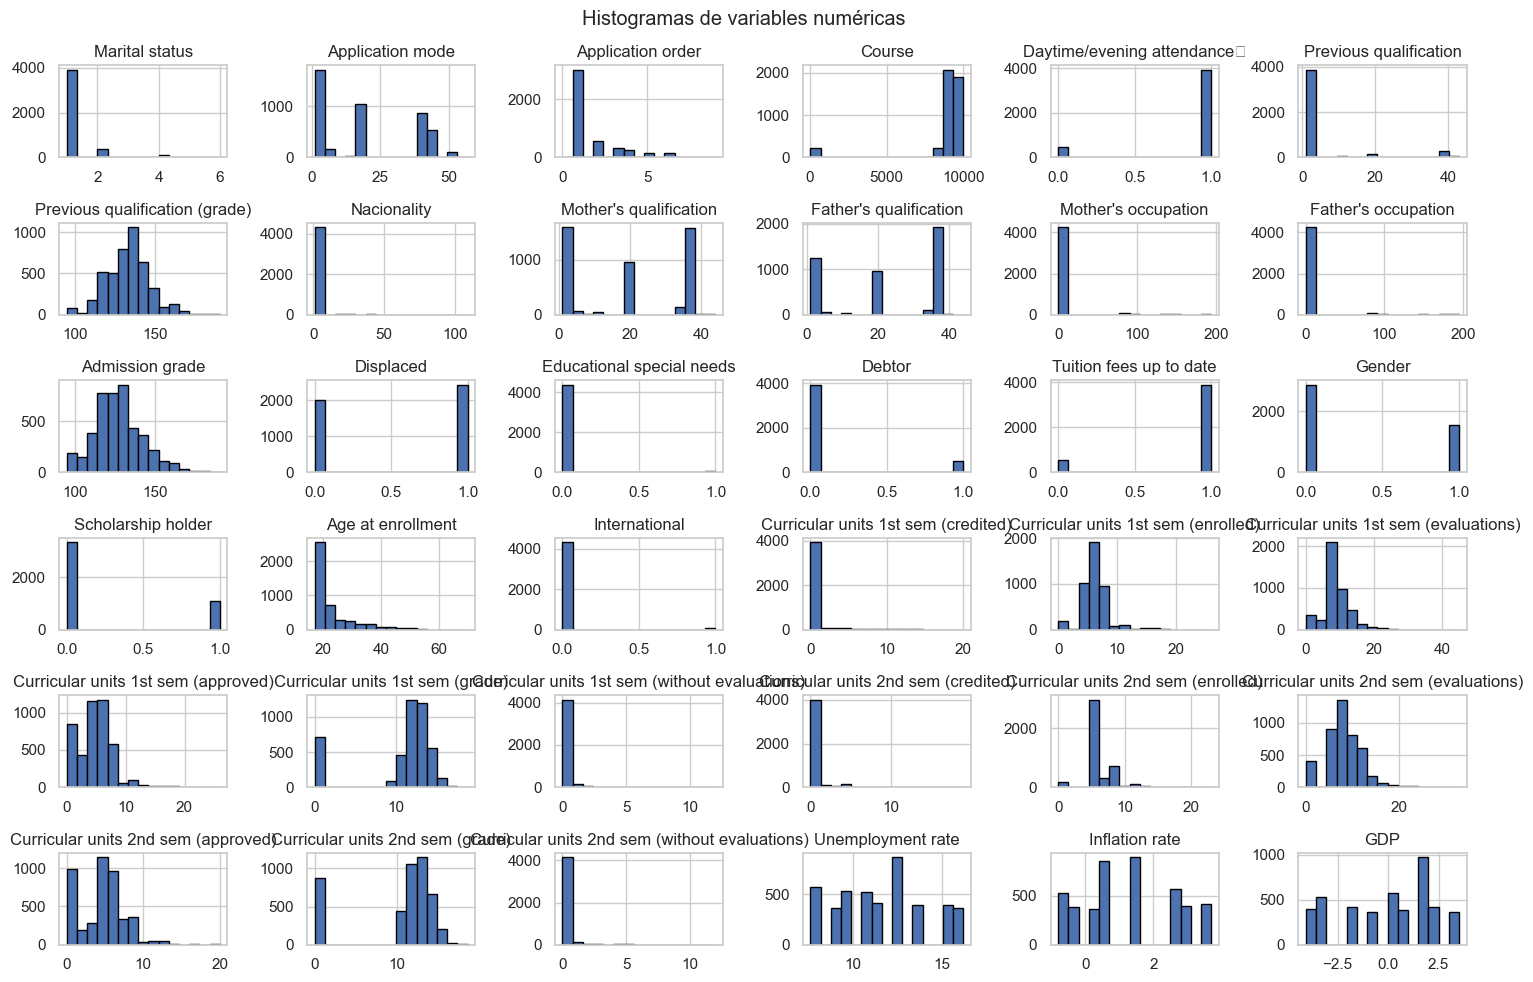

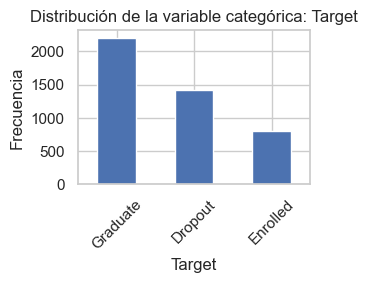

In [ ]:
# Histogramas
df.hist(bins=15, edgecolor='black', figsize=(15, 10))
plt.suptitle('Histogramas de variables numéricas')
plt.tight_layout()
plt.show()

# Gráficos de barras para variables categóricas
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Distribución de la variable categórica: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()


# Top 10 de variables con correlación

Top 10 variables most correlated with Dropout:
Curricular units 2nd sem (grade)       0.571792
Curricular units 2nd sem (approved)    0.569500
Curricular units 1st sem (grade)       0.480669
Curricular units 1st sem (approved)    0.479112
Tuition fees up to date                0.429149
Age at enrollment                      0.254215
Scholarship holder                     0.245354
Debtor                                 0.229407
Gender                                 0.203983
Application mode                       0.198458
dtype: float64


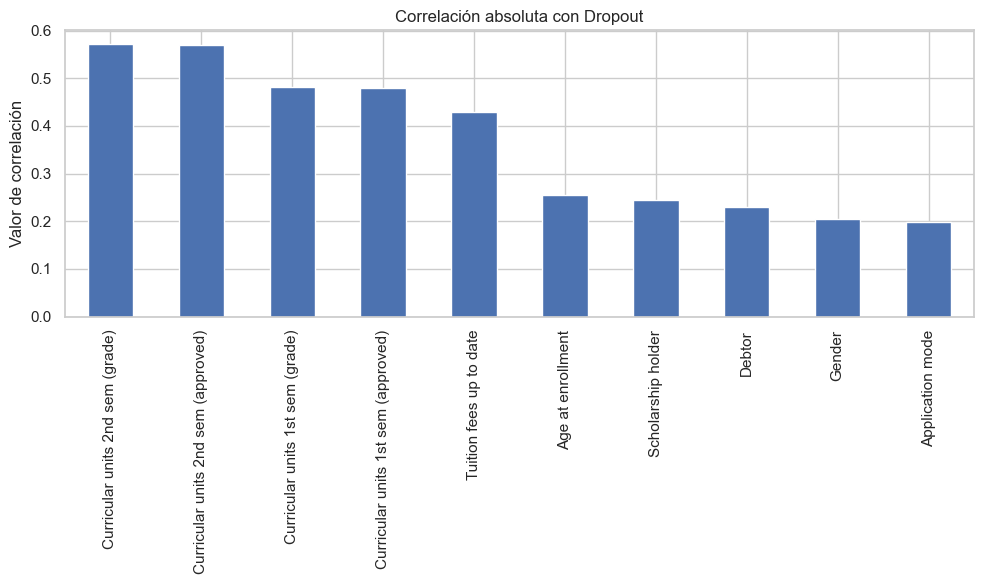

<Figure size 600x400 with 0 Axes>

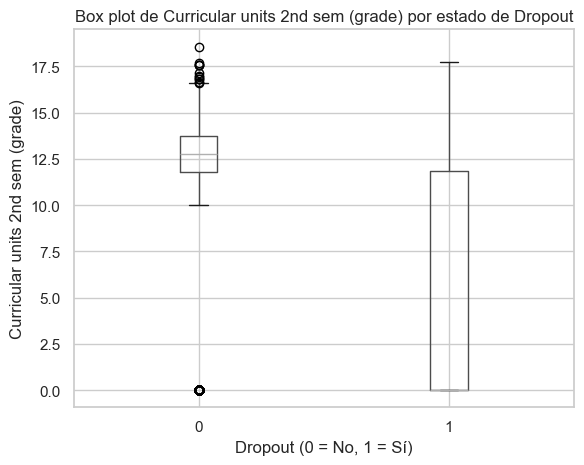

<Figure size 600x400 with 0 Axes>

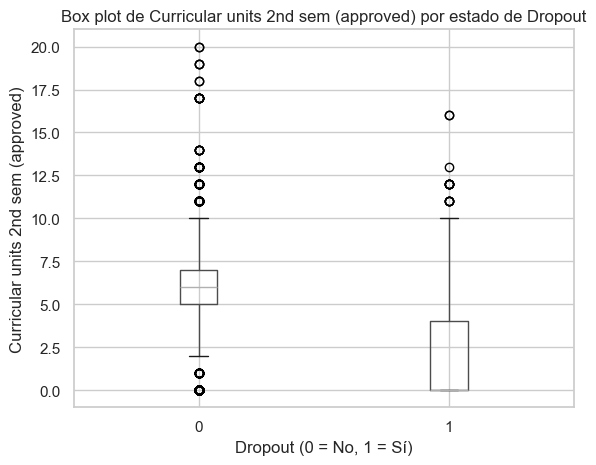

<Figure size 600x400 with 0 Axes>

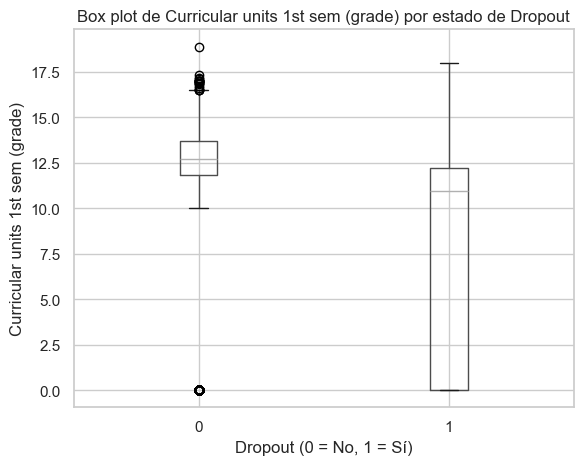

<Figure size 600x400 with 0 Axes>

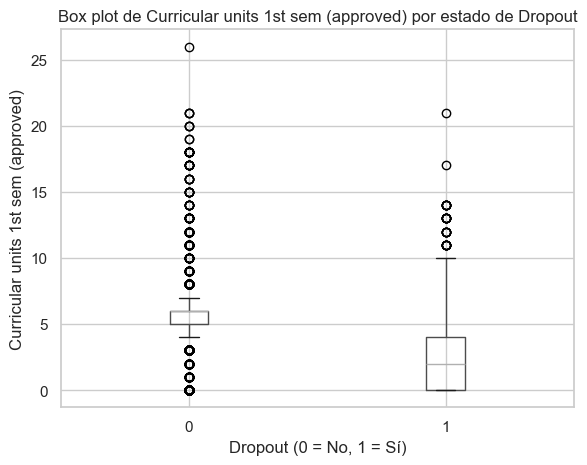

<Figure size 600x400 with 0 Axes>

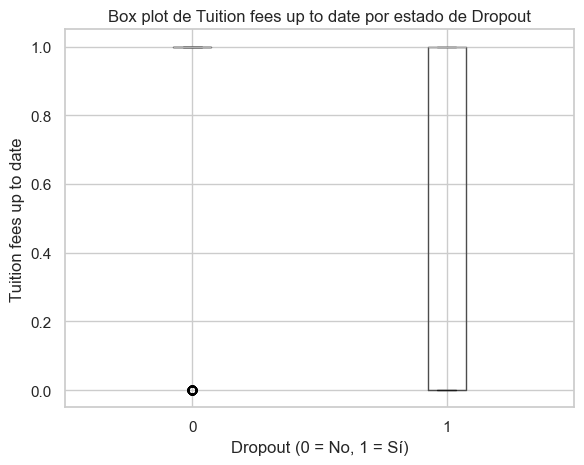

<Figure size 600x400 with 0 Axes>

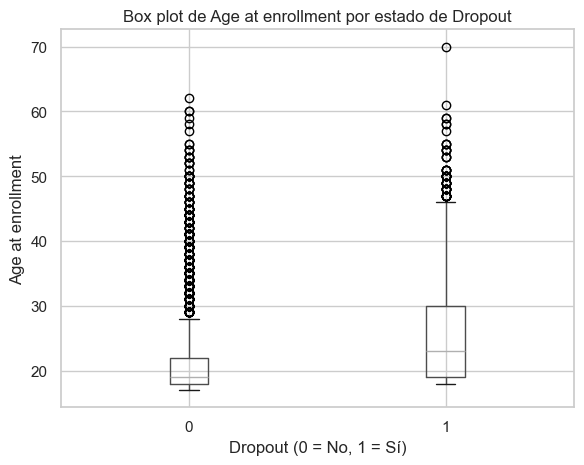

<Figure size 600x400 with 0 Axes>

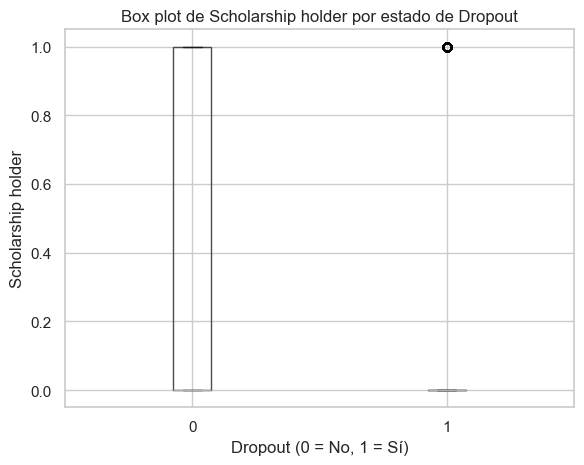

<Figure size 600x400 with 0 Axes>

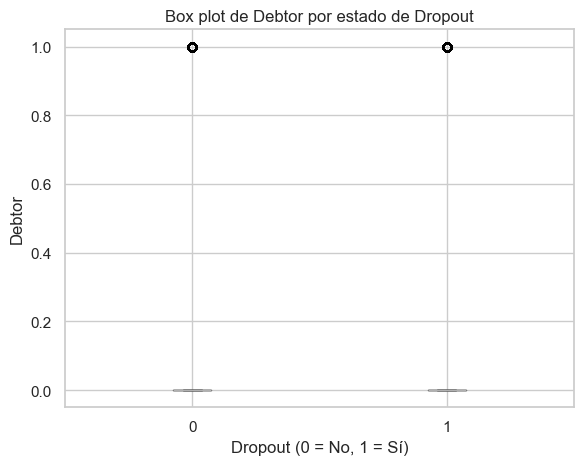

<Figure size 600x400 with 0 Axes>

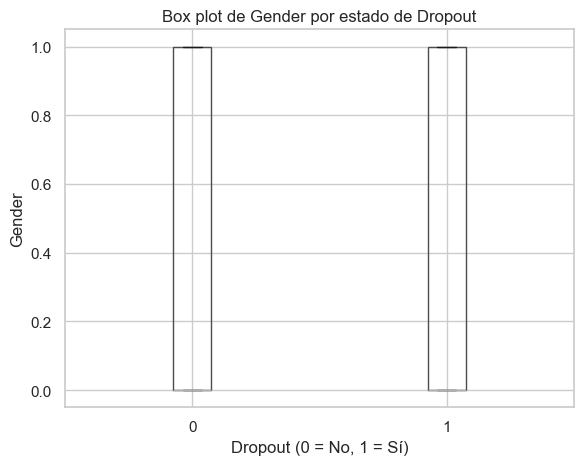

<Figure size 600x400 with 0 Axes>

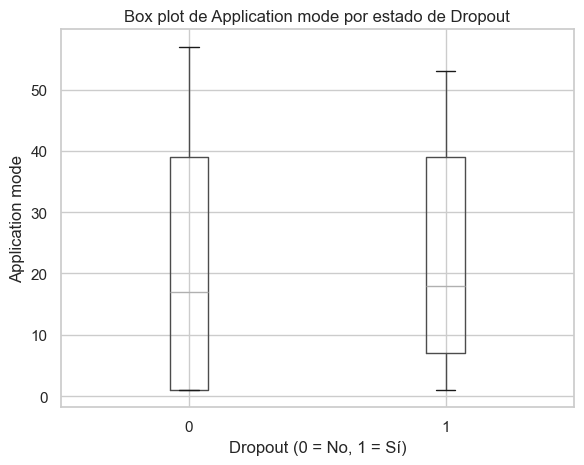

In [8]:
# Binarize the target: Dropout vs others
df['is_dropout'] = (df['Target'] == 'Dropout').astype(int)

# Compute Pearson correlation for numeric variables
numeric_cols = df.select_dtypes(include='number').columns.drop('is_dropout')
correlations = df[numeric_cols].corrwith(df['is_dropout']).abs().sort_values(ascending=False)

# Select top 10 variables
top10 = correlations.head(10)

# Display the list of top 10 variables with their correlation values
print("Top 10 variables most correlated with Dropout:")
print(top10)

# Bar plot of the correlations
plt.figure(figsize=(10, 6))
top10.plot(kind='bar')
plt.title('Correlación absoluta con Dropout')
plt.ylabel('Valor de correlación')
plt.tight_layout()
plt.show()

# Box plots for each of the top 10 variables
for var in top10.index:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=var, by='is_dropout')
    plt.title(f'Box plot de {var} por estado de Dropout')
    plt.suptitle('')  # Remove automatic title
    plt.xlabel('Dropout (0 = No, 1 = Sí)')
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

# Mapa de calor del top 10 de variables

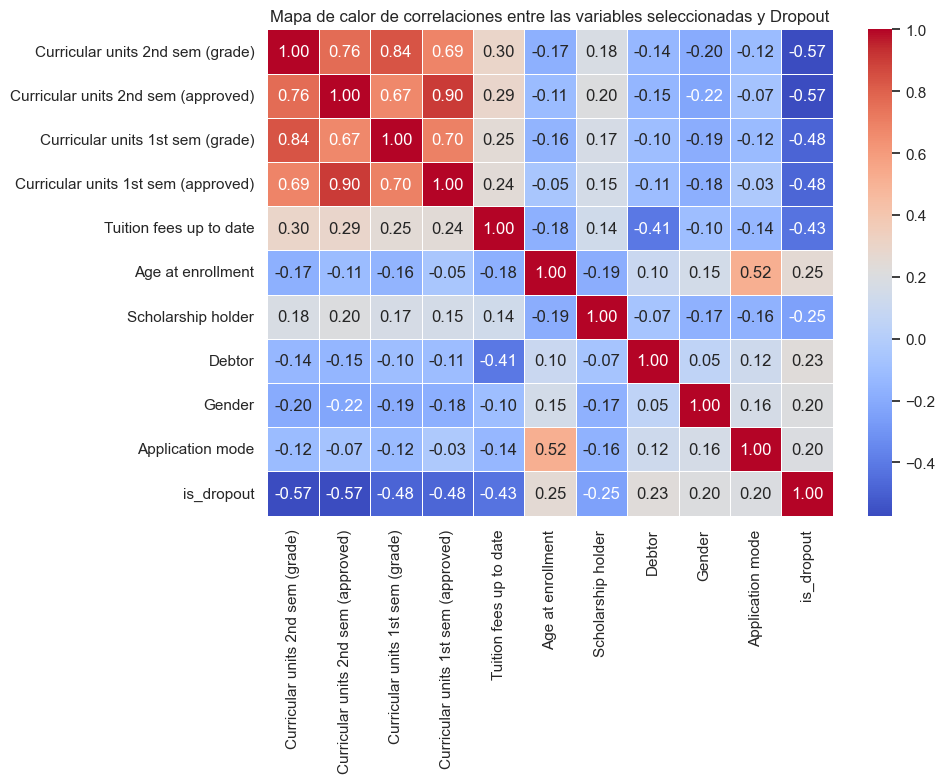

In [9]:
# Subset the dataframe to include only the top 10 variables and the target
top_vars = top10.index.tolist()
top_df = df[top_vars + ['is_dropout']]

# Compute correlation matrix
corr_matrix = top_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlaciones entre las variables seleccionadas y Dropout')
plt.tight_layout()
plt.show()